In [ ]:
import json
import torch
import torch.nn as nn
from TransformerEncoder import TransformerEncoder
model = TransformerEncoder()
model_size = sum(p.numel() for p in model.parameters()) / (1024 * 1024)
model

In [2]:
print("Model size: {:.3f} MB".format(model_size))

Model size: 16.063 MB


In [3]:
data = "./data.json"
f = open(data)
data = json.load(f)
train_data = data["data"]["train"]
train_data

[[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 [15, 7, 9, 4, 12, 6, 2, 3, 8, 11, 14, 5, 13, 1, 10],
 [10, 15, 3, 8, 5, 6, 13, 12, 9, 1, 11, 14, 7, 4, 2]]

In [4]:
label = data["data"]["label"]
label

[[0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 3, 0],
 [0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 3, 0, 0, 0, 0],
 [0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 1]]

In [5]:
cv_data = data["data"]["valid"]
cv_data

[[6, 15, 3, 8, 5, 10, 13, 12, 14, 1, 11, 7, 2, 4, 9]]

In [6]:
cv_label = data["data"]["v_label"]
cv_label

[[0, 0, 0, 2, 0, 0, 0, 0, 3, 0, 0, 0, 1, 0, 0]]

In [7]:
lossfn = nn.CrossEntropyLoss()
pred_logmax = nn.LogSoftmax(dim=1)
lr = 1e-4
optermizer = torch.optim.Adam(model.parameters(), lr=lr)
data = torch.tensor(train_data)
data

tensor([[ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15],
        [15,  7,  9,  4, 12,  6,  2,  3,  8, 11, 14,  5, 13,  1, 10],
        [10, 15,  3,  8,  5,  6, 13, 12,  9,  1, 11, 14,  7,  4,  2]])

In [8]:

label = torch.tensor(label)
label

tensor([[0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 3, 0],
        [0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 3, 0, 0, 0, 0],
        [0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 1]])

In [9]:
cv_data = torch.tensor(cv_data)
cv_data

tensor([[ 6, 15,  3,  8,  5, 10, 13, 12, 14,  1, 11,  7,  2,  4,  9]])

In [10]:
cv_label = torch.tensor(cv_label)
cv_label

tensor([[0, 0, 0, 2, 0, 0, 0, 0, 3, 0, 0, 0, 1, 0, 0]])

In [11]:
loss_train = []
loss_cv = []
for epoch in range(2):
    for i in range(2000):
        model.train()
        pred = model(data)
        pred = pred.transpose(2, 1)
        loss = lossfn(pred, label)
        optermizer.zero_grad()
        loss.backward()
        optermizer.step()
        if i % 100 == 0:
            print("train_loss: {:.3f}".format(loss.detach().float().tolist()))
            loss_train.append(loss.item())
        model.eval()
        with torch.no_grad():
            cv_pred = model(cv_data)
            cv_pred = cv_pred.transpose(2, 1)
            cv_loss = lossfn(cv_pred, cv_label)
            if i % 100 == 0:
                print("cv_loss: {:.3f}".format(cv_loss.detach().float().tolist()))
                loss_cv.append(cv_loss.item())

train_loss: 1.385
cv_loss: 1.350
train_loss: 0.794
cv_loss: 0.769
train_loss: 0.750
cv_loss: 0.745
train_loss: 0.746
cv_loss: 0.745
train_loss: 0.745
cv_loss: 0.744
train_loss: 0.745
cv_loss: 0.744
train_loss: 0.745
cv_loss: 0.744
train_loss: 0.744
cv_loss: 0.744
train_loss: 0.745
cv_loss: 0.744
train_loss: 0.744
cv_loss: 0.744
train_loss: 0.744
cv_loss: 0.744
train_loss: 0.745
cv_loss: 0.744
train_loss: 0.744
cv_loss: 0.744
train_loss: 0.744
cv_loss: 0.744
train_loss: 0.744
cv_loss: 0.744
train_loss: 0.744
cv_loss: 0.744
train_loss: 0.744
cv_loss: 0.744
train_loss: 0.744
cv_loss: 0.744
train_loss: 0.744
cv_loss: 0.744
train_loss: 0.744
cv_loss: 0.744
train_loss: 0.744
cv_loss: 0.744
train_loss: 0.744
cv_loss: 0.744
train_loss: 0.744
cv_loss: 0.744
train_loss: 0.744
cv_loss: 0.744
train_loss: 0.744
cv_loss: 0.744
train_loss: 0.744
cv_loss: 0.744
train_loss: 0.744
cv_loss: 0.744
train_loss: 0.744
cv_loss: 0.744
train_loss: 0.744
cv_loss: 0.744
train_loss: 0.744
cv_loss: 0.744
train_loss

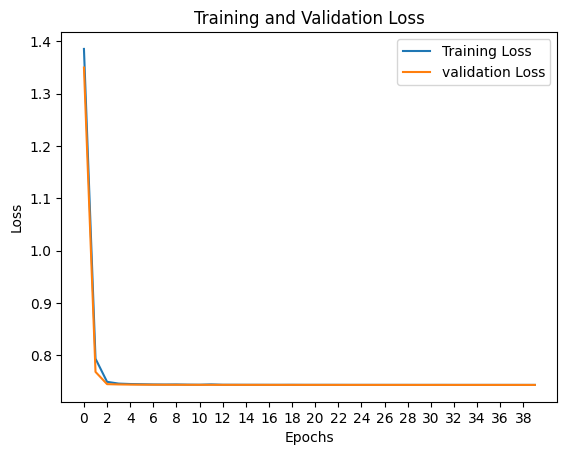

In [12]:

from matplotlib.pylab import plt
from numpy import arange
import numpy as np
plt.plot(np.array(loss_train), label='Training Loss')
plt.plot(np.array(loss_cv), label='validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xticks(arange(0, 40, 2))
plt.legend(loc='best')
plt.show()